# Comparación entre noticias del mundo y el marca

## Empezamos cargando las noticias de "El Mundo"

In [1]:
import pandas as pd
import numpy as np
import csv

In [2]:
DatosNoticias_ElMundo = pd.DataFrame()
DatosNoticias_Marca = pd.DataFrame()

### Las guardamos en la variable 'csv_reader_EM'

In [13]:
with open('.\Data\El Mundo.csv') as csv_El_Mundo:
    csv_reader_EM = csv.reader(csv_El_Mundo, delimiter='|')
    line_count = 0
    for row in csv_reader_EM:
        if line_count == 0:
            DatosNoticias_ElMundo = pd.DataFrame(columns=['Título', 'Autor', 'Contenido', 'Target'], index=range(1,100))
            line_count += 1
        else:
            DatosNoticias_ElMundo['Título'][line_count] = str(row[1])
            DatosNoticias_ElMundo['Autor'][line_count] = str(row[0]).replace(" ", "")
            DatosNoticias_ElMundo['Contenido'][line_count] = str(row[2])
            DatosNoticias_ElMundo['Target'][line_count] = 0
            line_count += 1
    print(f'Processed {line_count} lines.')
line_count_EM = line_count

Processed 100 lines.


In [14]:
DatosNoticias_ElMundo.head(2)

,Título,Autor,Contenido,Target
1,Detenida una pareja tras fingir ser los padres...,EUROPAPRESS,Agentes de la Policía Nacional han detenido a ...,0
2,Dos policías detenidos en Río como sospechosos...,AFP,Dos policías fueron detenidos el martes en Río...,0


## Cargamos también las noticias del periódico deportivo "Marca"

### Las guardamos en la variable 'csv_reader_M'

In [15]:
with open('.\Data\Marca.csv') as csv_Marca:
    csv_reader_M = csv.reader(csv_Marca, delimiter='|')
    line_count = 0
    for row in csv_reader_M:
        if line_count == 0:
            DatosNoticias_Marca = pd.DataFrame(columns=['Título', 'Autor', 'Contenido', 'Target'], index=range(1,100))
            line_count += 1
        else:
            DatosNoticias_Marca['Título'][line_count] = str(row[1])
            DatosNoticias_Marca['Autor'][line_count] = str(row[0]).replace(" ", "")
            DatosNoticias_Marca['Contenido'][line_count] = str(row[2])
            DatosNoticias_Marca['Target'][line_count] = 1
            line_count += 1
    print(f'Processed {line_count} lines.')
line_count_M = line_count

Processed 100 lines.


In [17]:
DatosNoticias_Marca.head(2)

,Título,Autor,Contenido,Target
1,"Álvaro Benito lo tiene claro: ""No ayuda a nadi...",RedacciónMARCA,"Álvaro Benito, comentarista de la Cadena SER y...",1
2,"Umtiti: ""Lo más fácil hubiera sido operarme""",marca.com,Samuel Umtiti concedió una entrevista a L'Equi...,1


## Unimos los dos dataframes en un gran dataframe de noticias 

In [18]:
DataFrames = [DatosNoticias_ElMundo, DatosNoticias_Marca]
Noticias = pd.concat(DataFrames)
del(DataFrames,DatosNoticias_ElMundo, DatosNoticias_Marca)

In [19]:
Noticias.head(2)

,Título,Autor,Contenido,Target
1,Detenida una pareja tras fingir ser los padres...,EUROPAPRESS,Agentes de la Policía Nacional han detenido a ...,0
2,Dos policías detenidos en Río como sospechosos...,AFP,Dos policías fueron detenidos el martes en Río...,0


In [20]:
Noticias.tail(2)

,Título,Autor,Contenido,Target
98,Chiellini: I'm 200 percent convinced that Cris...,marca.com,Giorgio Chiellini AFP Juventus captain Giorg...,1
99,"Terapia de Grupo: ""Zidane le echa valor regres...",RadioMARCA,Zidane durante la rueda de prensa de su desped...,1


In [21]:
Noticias['Título'].head()

1    Detenida una pareja tras fingir ser los padres...
2    Dos policías detenidos en Río como sospechosos...
3    Causa el doble de muertes de lo que se creía: ...
4    Lío entre Risto Mejide y la 'antifeminista' So...
5    Eurovisión ya tiene sus favoritos y España no ...
Name: Título, dtype: object

## Convertimos los csv's en un formato que podamos usar en nuestro modelo predictivo (Word Cleaning + HotEnd Encoding)

In [22]:
from sklearn import feature_extraction

#vectorizador_count = feature_extraction.text.CountVectorizer()
#X = vectorizador_count.fit_transform(Noticias['Título'])

vectorizador_tfidf = feature_extraction.text.TfidfVectorizer()
texto_vectorizado = vectorizador_tfidf.fit_transform(Noticias['Título'])
df_titulo_procesado =  pd.DataFrame(texto_vectorizado.toarray(), columns=vectorizador_tfidf.get_feature_names())

vectorizador_tfidf = feature_extraction.text.TfidfVectorizer()
texto_vectorizado = vectorizador_tfidf.fit_transform(Noticias['Autor'])
df_autor_procesado =  pd.DataFrame(texto_vectorizado.toarray(), columns=vectorizador_tfidf.get_feature_names())

vectorizador_tfidf = feature_extraction.text.TfidfVectorizer()
texto_vectorizado = vectorizador_tfidf.fit_transform(Noticias['Contenido'])
df_contenido_procesado =  pd.DataFrame(texto_vectorizado.toarray(), columns=vectorizador_tfidf.get_feature_names())


In [23]:
df_autor_procesado.shape

(198, 102)

In [24]:
df_contenido_procesado.shape

(198, 3248)

In [25]:
Noticias.shape

(198, 4)

In [26]:
Noticias = Noticias.reset_index(drop=True)

In [27]:
Noticias_Procesadas = pd.concat(
[
    Noticias,
    df_titulo_procesado,
    df_autor_procesado,
    df_contenido_procesado
], axis=1, sort=False)

del(df_titulo_procesado,
    df_autor_procesado,
    df_contenido_procesado)

In [28]:
Noticias_Procesadas.shape

(198, 4498)

In [30]:
Noticias_Procesadas.head(2)

,Título,Autor,Contenido,Target,000,10,100,11,12,14,...,ídem,íntima,órdenes,órgano,última,últimas,último,últimos,única,único
0,Detenida una pareja tras fingir ser los padres...,EUROPAPRESS,Agentes de la Policía Nacional han detenido a ...,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Dos policías detenidos en Río como sospechosos...,AFP,Dos policías fueron detenidos el martes en Río...,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
Noticias_num = Noticias_Procesadas
Noticias_num = Noticias_num.drop(['Título', 'Autor', 'Contenido'], axis=1)

In [103]:
y = Noticias_num['Target']
X = Noticias_num.drop(['Target'], axis=1)

In [82]:
X.shape

(198, 4494)

In [83]:
X.head(2)

,000,10,100,11,12,14,15,18,20,200,...,ídem,íntima,órdenes,órgano,última,últimas,último,últimos,única,único
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [84]:
y.shape

(198,)

In [85]:
y.head(2)

0    0
1    0
Name: Target, dtype: object

## Creamos el modelo predictivo usando Keras, y lo entrenamos con nuestros datos

In [86]:
from tensorflow import keras
import keras
# import keras

In [87]:
from keras.models import Sequential
from keras.layers import Dense

In [114]:
modelo = Sequential([
    Dense(units=5, activation='sigmoid', input_dim=4494),
    Dense(units=1, activation='sigmoid')
])

In [129]:
modelo.compile(loss="binary_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

### Estandarizamos la X

In [95]:
X[:2]

,000,10,100,11,12,14,15,18,20,200,...,ídem,íntima,órdenes,órgano,última,últimas,último,últimos,única,único
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [90]:
from sklearn.preprocessing import StandardScaler

X_Std = StandardScaler().fit_transform(X)

In [96]:
X_Std[:2]

array([[-0.10100459, -0.12326656, -0.07124705, ..., -0.14348914,
        -0.10099384, -0.10096687],
       [-0.10100459, -0.12326656, -0.07124705, ..., -0.14348914,
        -0.10099384, -0.10096687]])

In [106]:
y = y.as_matrix()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [107]:
type(y)

numpy.ndarray

In [109]:
y = y.reshape(len(y),1)

In [111]:
y[:2]

array([[0],
       [0]], dtype=object)

In [116]:
historial = modelo.fit(X_Std, y, epochs=100)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
198/198 [==============================] - 1s 4ms/step - loss: 0.7856 - acc: 0.5000
Epoch 2/100
198/198 [==============================] - 0s 212us/step - loss: 0.7538 - acc: 0.5000
Epoch 3/100
198/198 [==============================] - 0s 247us/step - loss: 0.7228 - acc: 0.5051
Epoch 4/100
198/198 [==============================] - 0s 232us/step - loss: 0.6941 - acc: 0.5101
Epoch 5/100
198/198 [==============================] - 0s 262us/step - loss: 0.6697 - acc: 0.5202
Epoch 6/100
198/198 [==============================] - 0s 242us/step - loss: 0.6445 - acc: 0.5404
Epoch 7/100
198/198 [==============================] - 0s 247us/step - loss: 0.6227 - acc: 0.5657
Epoch 8/100
198/198 [==============================] - 0s 262us/step - loss: 0.6029 - acc: 0.5859
Epoch 9/100
198/198 [==============================] - 0s 232us/step - loss: 0.5840 - acc: 0.6111
Epoch 10/100
198/198 [==============================] - 0s 237us/step - 

198/198 [==============================] - 0s 242us/step - loss: 0.1661 - acc: 1.0000
Epoch 82/100
198/198 [==============================] - 0s 272us/step - loss: 0.1642 - acc: 1.0000
Epoch 83/100
198/198 [==============================] - 0s 222us/step - loss: 0.1622 - acc: 1.0000
Epoch 84/100
198/198 [==============================] - 0s 212us/step - loss: 0.1604 - acc: 1.0000
Epoch 85/100
198/198 [==============================] - 0s 207us/step - loss: 0.1585 - acc: 1.0000
Epoch 86/100
198/198 [==============================] - 0s 201us/step - loss: 0.1567 - acc: 1.0000
Epoch 87/100
198/198 [==============================] - 0s 191us/step - loss: 0.1549 - acc: 1.0000
Epoch 88/100
198/198 [==============================] - 0s 212us/step - loss: 0.1532 - acc: 1.0000
Epoch 89/100
198/198 [==============================] - 0s 201us/step - loss: 0.1515 - acc: 1.0000
Epoch 90/100
198/198 [==============================] - 0s 217us/step - loss: 0.1498 - acc: 1.0000
Epoch 91/100
198/198 [=

In [118]:
import matplotlib.pyplot as plt

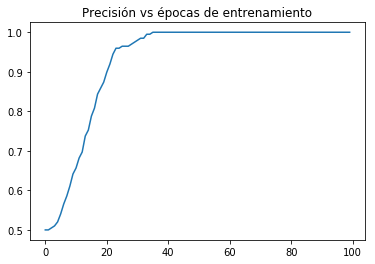

In [119]:
plt.plot(historial.history["acc"])
plt.title("Precisión vs épocas de entrenamiento");

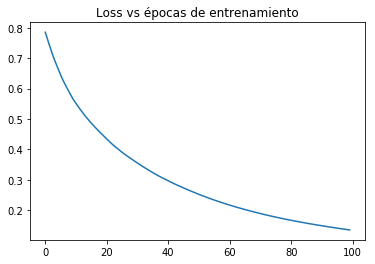

In [127]:
plt.plot(historial.history["loss"])
plt.title("Loss vs épocas de entrenamiento");

#### En este gráfico vemos que se alcanza la máxima precisión después de las 40 épocas, pero en cambio en lo referido a "loss", vemos que sigue decreciendo, lo que puede significar que la complejidad del modelo aumenta o que lo hace su efectividad.

## Comprobamos el porcentaje de acierto de nuestro modelo

In [121]:
scores = modelo.evaluate(X_Std, y)
scores

198/198 [==============================] - 0s 725us/step


[0.13353994654284584, 1.0]

In [122]:
modelo.metrics_names

['loss', 'acc']

## Guardamos nuestro modelo, para poder ser usado posteriormente

In [124]:
from keras.callbacks import ModelCheckpoint

In [134]:
checkpoint = ModelCheckpoint(filepath='modelo.hdf5', verbose=1, period=10)


modelo = Sequential([
    Dense(units=5, activation='sigmoid', input_dim=4494),
    Dense(units=1, activation='sigmoid')
])
modelo.compile(loss='binary_crossentropy', optimizer="sgd", metrics=["acc"])

modelo.fit(X_Std, y, epochs=100, 
           verbose=1, callbacks=[checkpoint]);

Epoch 1/100
198/198 [==============================] - 1s 4ms/step - loss: 0.7884 - acc: 0.4899
Epoch 2/100
198/198 [==============================] - 0s 242us/step - loss: 0.7434 - acc: 0.4949
Epoch 3/100
198/198 [==============================] - 0s 245us/step - loss: 0.7017 - acc: 0.5101
Epoch 4/100
198/198 [==============================] - 0s 242us/step - loss: 0.6648 - acc: 0.5505
Epoch 5/100
198/198 [==============================] - 0s 257us/step - loss: 0.6319 - acc: 0.5707
Epoch 6/100
198/198 [==============================] - 0s 237us/step - loss: 0.6008 - acc: 0.6061
Epoch 7/100
198/198 [==============================] - 0s 247us/step - loss: 0.5716 - acc: 0.6364
Epoch 8/100
198/198 [==============================] - ETA: 0s - loss: 0.5215 - acc: 0.781 - 0s 252us/step - loss: 0.5461 - acc: 0.6667
Epoch 9/100
198/198 [==============================] - 0s 232us/step - loss: 0.5225 - acc: 0.7020
Epoch 10/100
198/198 [==============================] - 0s 285us/step - loss: 0.50

198/198 [==============================] - 0s 262us/step - loss: 0.1506 - acc: 1.0000

Epoch 00080: saving model to modelo.hdf5
Epoch 81/100
198/198 [==============================] - 0s 222us/step - loss: 0.1492 - acc: 1.0000
Epoch 82/100
198/198 [==============================] - 0s 196us/step - loss: 0.1479 - acc: 1.0000
Epoch 83/100
198/198 [==============================] - 0s 212us/step - loss: 0.1466 - acc: 1.0000
Epoch 84/100
198/198 [==============================] - 0s 222us/step - loss: 0.1454 - acc: 1.0000
Epoch 85/100
198/198 [==============================] - 0s 196us/step - loss: 0.1441 - acc: 1.0000
Epoch 86/100
198/198 [==============================] - 0s 217us/step - loss: 0.1429 - acc: 1.0000
Epoch 87/100
198/198 [==============================] - 0s 196us/step - loss: 0.1417 - acc: 1.0000
Epoch 88/100
198/198 [==============================] - 0s 217us/step - loss: 0.1405 - acc: 1.0000
Epoch 89/100
198/198 [==============================] - 0s 214us/step - loss: 0.

## Si queremos volver a cargar el modelo, tendríamos que usar lo siguiente 

In [135]:
# from keras.models import load_model

# modelo_recargado = load_model("modelo.hdf5")